In [44]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset

class FactVerificationDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.tokenizer = RobertaTokenizer.from_pretrained('roberta-large-mnli')  # Change to the desired model name

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        encoded_input = self.tokenizer.encode_plus(
            item['Claim'],
            item['evidence'],
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )
        label = item['label']
        return {
            'input_ids': encoded_input['input_ids'].squeeze(),
            'attention_mask': encoded_input['attention_mask'].squeeze(),
            'label': torch.tensor(label)
        }

# Step 2: Load the pre-trained model
model = RobertaForSequenceClassification.from_pretrained('roberta-large-mnli', num_labels=3)  # Change to the desired model name
tokenizer = RobertaTokenizer.from_pretrained('roberta-large-mnli')  # Change to the desired model name


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
pip install transformers

In [36]:
import json

# Step 1: Open the JSON file
with open('/content/results_5000 (1).json', 'r', encoding='utf-8') as file:
    # Step 2: Parse the JSON data
    training_data = json.load(file)

# Step 3: Access the data
print(training_data)

[{'Claim': 'Video makes infertility claim about development of GM crops\n', 'Most Relevant Sentence': 'A video featuring the founder of a far-right US-based website claims scientists can now genetically modify crops in order "to cause infertility in black people" by using a specific type of technology however This is misleading', 'label': 0}, {'Claim': "The Stormzy Prize-winner's debut We Are All Birds of Uganda is an ambitious multi-layered epic.", 'Most Relevant Sentence': 'It was praised for its deep storytelling and ability to celebrate love while also addressing pressing global issues', 'label': 2}, {'Claim': 'Dom Bess took five wickets on Day 1 of the 1st Test against Sri Lanka, but said he got lucky with some of the wickets and he could have bowled better.', 'Most Relevant Sentence': 'After their tons in the ICC World Test Championship Final against India at The Oval, Head has 884 points', 'label': 2}, {'Claim': 'Locals in Pakistan opposed tree plantation because it was un-Islam

In [37]:
import json

# Step 1: Open the JSON file
with open('/content/test - Copy.json', 'r', encoding='utf-8') as file:
    # Step 2: Parse the JSON data
    testing_data = json.load(file)

# Step 3: Access the data
print(testing_data)

[{'Claim': 'Asif Zardari has announced support for Imran Khan, saying Shehbaz Sharif cannot lead Pakistan', 'evidence': 'Asif Zardari has not announced support for Khan, nor has he said Sharif cannot lead Pakistan', 'label': 0}, {'Claim': 'A video shows a Punjab Police officer “misbehaving” and “insulting” an older woman amid a recent crackdown by authorities following protests across Pakistan against the 9 May arrest of Imran Khan.', 'evidence': 'The video is not recent, nor does it have anything to do with the May 2023 crackdown by Punjab Police and they were not misbehaving and insulting an older women. ', 'label': 0}, {'Claim': "Video shows Akshay Kumar condemning Imran Khan's arrest", 'evidence': 'We found that the viral clip has been digitally altered by adding Kumar condemning the arrest of imran Khan as Akshay kumar was not condemn the arrest of imran khan', 'label': 0}, {'Claim': 'Former prime minister and Pakistan Tehreek-e-Insaf (PTI) chief Imran Khan has died.', 'evidence':

In [38]:
dataset = FactVerificationDataset(training_data)

In [39]:
# Step 4: Model architecture and fine-tuning
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 5: Train the model
optimizer = AdamW(model.parameters(), lr=2e-5)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)# Step 4: Model architecture and fine-tuning
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 5: Train the model
optimizer = AdamW(model.parameters(), lr=2e-5)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [40]:
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs} - Average Loss: {average_loss}")


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 1/2 - Average Loss: 0.31907817986183845


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 2/2 - Average Loss: 0.1290463250213728


In [41]:
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [56]:
evaluation_dataset = FactVerificationDataset(testing_data)  # Replace eval_data with your evaluation dataset
evaluation_dataloader = DataLoader(evaluation_dataset, batch_size=16, shuffle=False)

In [57]:
print(f"Device of input_ids: {input_ids.device}")
print(f"Device of attention_mask: {attention_mask.device}")
print(f"Device of labels: {labels.device}")
print(f"Device of model: {next(model.parameters()).device}")

Device of input_ids: cuda:0
Device of attention_mask: cuda:0
Device of labels: cuda:0
Device of model: cuda:0


In [58]:
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [59]:

correct_predictions = 0
total_predictions = 0

for batch in evaluation_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['label'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predicted_labels = torch.argmax(outputs.logits, dim=1)

    correct_predictions += (predicted_labels == labels).sum().item()
    total_predictions += len(labels)

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy}")

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Accuracy: 0.6098081023454158


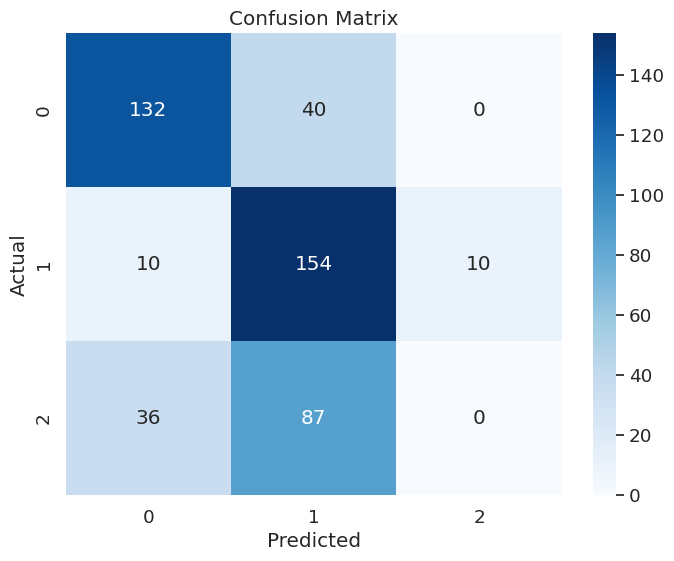

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming correct_predictions and predicted_labels are your data
correct_predictions = [0, 1, 2, 0, 1, 2, 0, 1, 2]
predicted_labels = [0, 1, 2, 1, 0, 1, 2, 0, 2]

# Get unique labels from the data
labels = [0,1,2]

# Create the confusion matrix
conf_matrix = confusion_matrix(original_labels_list, predicted_labels_list, labels=labels)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [61]:
from sklearn.metrics import classification_report

# Assuming original_labels_list and predicted_labels_list are your data


# Get unique labels from the data
labels = sorted(set(original_labels_list + predicted_labels_list))

# Compute the classification report
class_report = classification_report(original_labels_list, predicted_labels_list, labels=labels)

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       172
           1       0.55      0.89      0.68       174
           2       0.00      0.00      0.00       123

    accuracy                           0.61       469
   macro avg       0.43      0.55      0.48       469
weighted avg       0.48      0.61      0.53       469



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score



# Get unique labels from the data
labels = sorted(set(original_labels_list + predicted_labels_list))

# Compute precision, recall, and F1 score for each class
precision_per_class = precision_score(original_labels_list, predicted_labels_list, labels=labels, average=None)
recall_per_class = recall_score(original_labels_list, predicted_labels_list, labels=labels, average=None)
f1_per_class = f1_score(original_labels_list, predicted_labels_list, labels=labels, average=None)

# Compute micro and macro averages
micro_precision = precision_score(original_labels_list, predicted_labels_list, average='micro')
micro_recall = recall_score(original_labels_list, predicted_labels_list, average='micro')
micro_f1 = f1_score(original_labels_list, predicted_labels_list, average='micro')

macro_precision = precision_score(original_labels_list, predicted_labels_list, average='macro')
macro_recall = recall_score(original_labels_list, predicted_labels_list, average='macro')
macro_f1 = f1_score(original_labels_list, predicted_labels_list, average='macro')

# Print or use the results as needed


In [63]:
print(micro_f1)

0.6098081023454158


In [64]:
print(macro_f1)

0.47706959706959706
